In [53]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx #https://refnx.readthedocs.io/en/latest/installation.html
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
import time
import mpld3 #you may need to pip install mpld3 to get this working - it allows zoom action on inline plots
import seaborn as sns
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/XRay/XRR/'
path = os.getcwd()
%load_ext autoreload
%autoreload 2

%matplotlib widget
import glob 
import ana_xrr

import matplotlib

matplotlib.rcParams.update({'font.size': 11})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
pth = '../Data/'
flist_lv = glob.glob('lv*.txt', root_dir=pth)
flist_lv.sort()
print(flist_lv)

labs_lv = ['67 nm Al', '30 nm Al/AlOx/37 nm Al', 'Slow 50 nm Al/5x AlOx/20 nm Al', 'Fast 50 nm Al/5x AlOx/20 nm Al','80 nm Ta/8 nm Al/AlOx/50 nm Al','80 nm Ta/8 nm Al/AlOx/50 nm Al','80 nm Ta/8 nm Al/AlOx/50 nm Al redo','80 nm Ta/AlOx/150 nm Ta']
flist_stan = glob.glob('su*.txt', root_dir=pth)
flist_stan.sort()
print(flist_stan)
labs_stan = ['80 Nb/8 Al/AlOx/50 Al 9 T Static','80 Nb/8 Al/AlOx/50 Al 9 T Static Redo','80 Nb/8 Al/AlOx/3 Al/80 nm Nb 9 T Static','80 Nb/8 Al/AlOx/50 Al 1 T Static','80 Nb/8 Al/AlOx/50 Al 6 T Dynamic','80 Nb/8 Al', '80 Nb/8 Al, a-plane', '80 Nb/8 Al extra clean', '80 Nb/8 Al unanneal']

flist = flist_lv + flist_stan
labs = labs_lv + labs_stan

['lv1_XRR_1_scan1.txt', 'lv2_XRR_1_scan1.txt', 'lv3_XRR_1_scan1.txt', 'lv4_XRR_1_scan1.txt', 'lv5_XRR_1_scan1.txt', 'lv6_XRR_1_redo_scan1.txt', 'lv6_XRR_1_scan1.txt', 'lv7_XRR_1_scan1.txt']
['su01_XRR_1_remeas_scan1.txt', 'su01_XRR_3_scan1.txt', 'su02_XRR_1_scan1.txt', 'su03_XRR_1_scan1.txt', 'su04_XRR_1_scan1.txt', 'su05_XRR_1_scan1.txt', 'su06_XRR_1_scan1.txt', 'su07_XRR_1_scan1.txt', 'su08_XRR_1_scan1.txt']


(1e-09, 1.25)

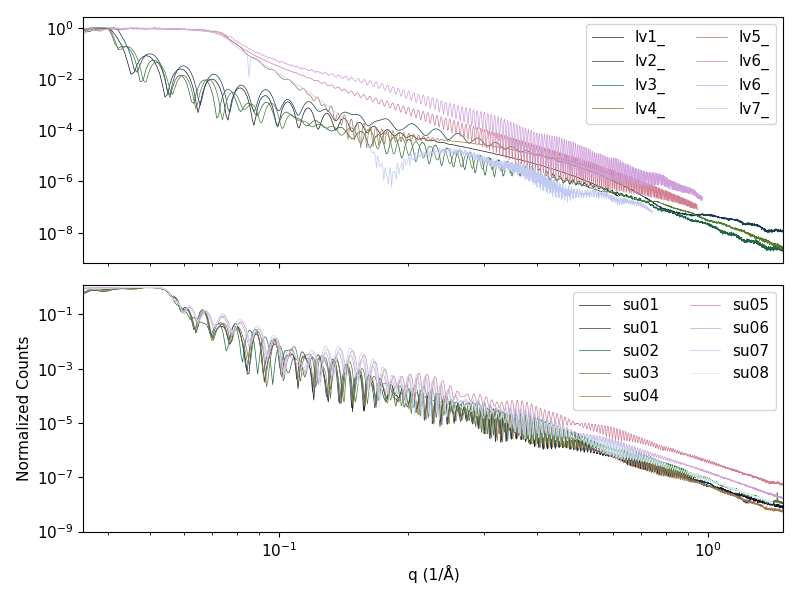

In [55]:
sns.set_palette('cubehelix',9)

fig, ax = plt.subplots(2,1, figsize=(8,6), sharex=True)

for i, f in enumerate(flist):     
    data = ana_xrr.loadRefData(os.path.join(pth,f)) #this function loads to the data and converts the x-data from 2-theta to q
    if i<8: 
        a = ax[0]
    else: 
        a=ax[1]
    a.loglog(data.x, data.y,linewidth=0.5, label=f[0:4])
    
    
ax[0].legend(ncols=2)
ax[1].legend(ncols=2)
ax[1].set_xlabel('q (1/Å)')
ax[1].set_ylabel('Normalized Counts')
fig.tight_layout()
ax[1].set_xlim([0.035,1.5])
ax[1].set_ylim([1e-9,1.25e0])

(1e-09, 1.25)

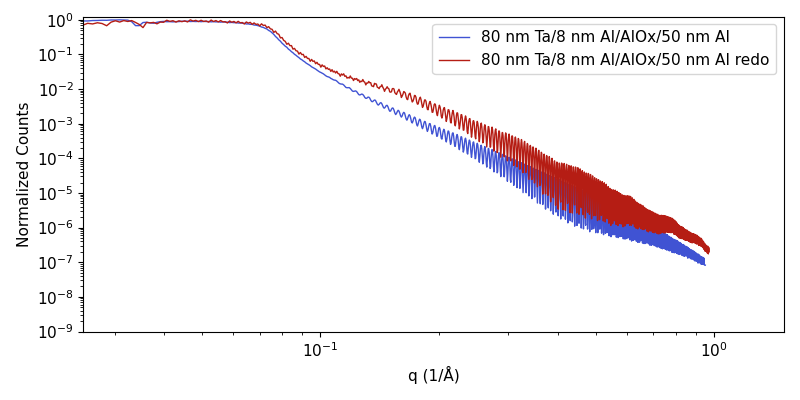

In [56]:
colors = ['#4053d3', '#b51d14', '#ddb310','#348f42','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

fig, ax = plt.subplots(1,1, figsize=(8,4))
labels=labs[5:7]
fname = flist[5:7]
for i, f in enumerate(fname):     
    data = ana_xrr.loadRefData(os.path.join(pth,f)) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labels[i])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.025,1.5])
ax.set_ylim([1e-9,1.25e0])

(1e-09, 1.25)

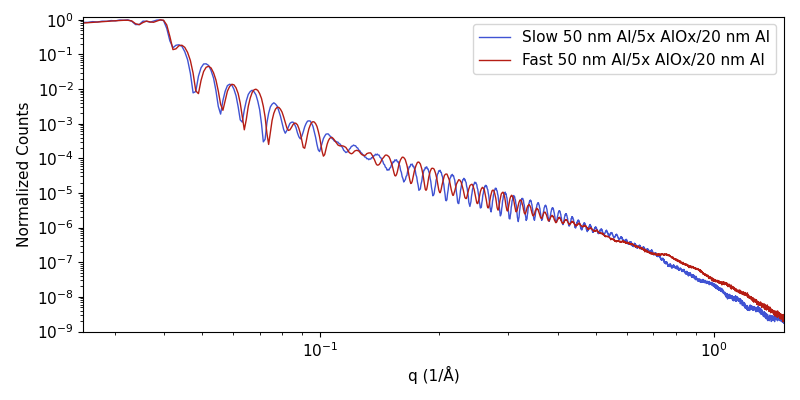

In [57]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
labels=labs[2:4]
fname = flist[2:4]
for i, f in enumerate(fname):     
    data = ana_xrr.loadRefData(os.path.join(pth,f)) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labels[i])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.025,1.5])
ax.set_ylim([1e-9,1.25e0])

(5e-07, 1.25)

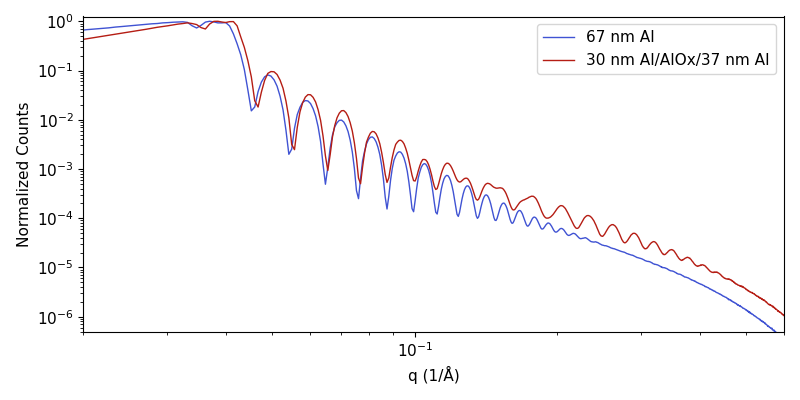

In [58]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
labels=labs[0:2]
fname = flist[0:2]
for i, f in enumerate(fname):     
    data = ana_xrr.loadRefData(os.path.join(pth,f)) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labels[i])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.02,0.6])
ax.set_ylim([5e-7,1.25e0])

(1e-09, 1.25)

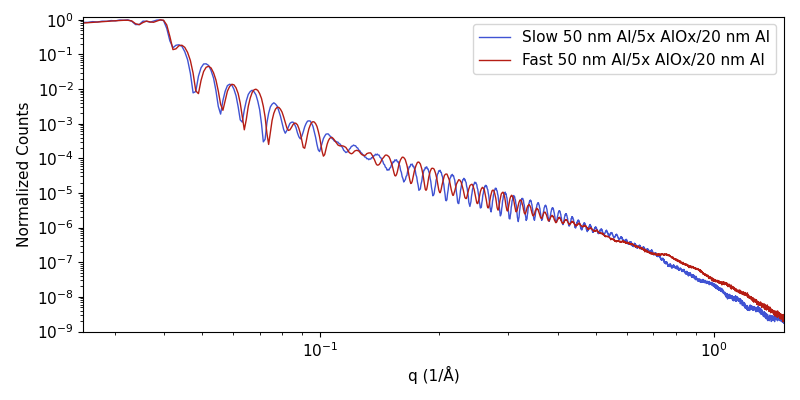

In [59]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
labels=labs[2:4]
fname = flist[2:4]
for i, f in enumerate(fname):     
    data = ana_xrr.loadRefData(os.path.join(pth,f)) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labels[i])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.025,1.5])
ax.set_ylim([1e-9,1.25e0])

(1e-09, 1.25)

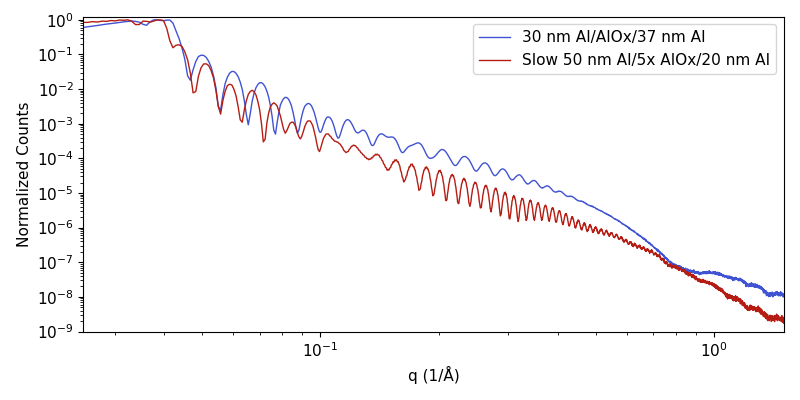

In [60]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
labels=labs[1:3]
fname = flist[1:3]
for i, f in enumerate(fname):     
    data = ana_xrr.loadRefData(os.path.join(pth,f)) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labels[i])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.025,1.5])
ax.set_ylim([1e-9,1.25e0])

(1e-09, 1.25)

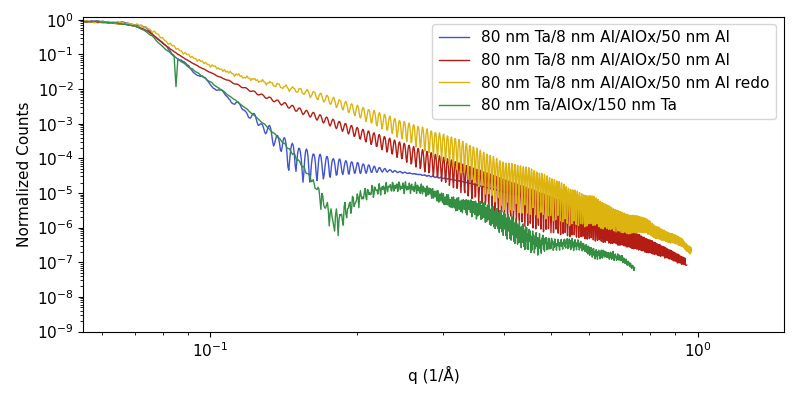

In [61]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [4,5,6,7]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.055,1.5])
ax.set_ylim([1e-9,1.25e0])

(5e-09, 1.25)

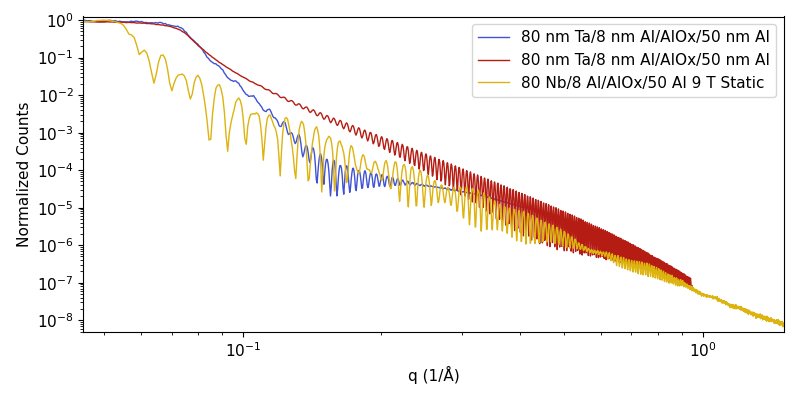

In [62]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [4,5,8]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1.5])
ax.set_ylim([5e-9,1.25e0])

(5e-09, 1.25)

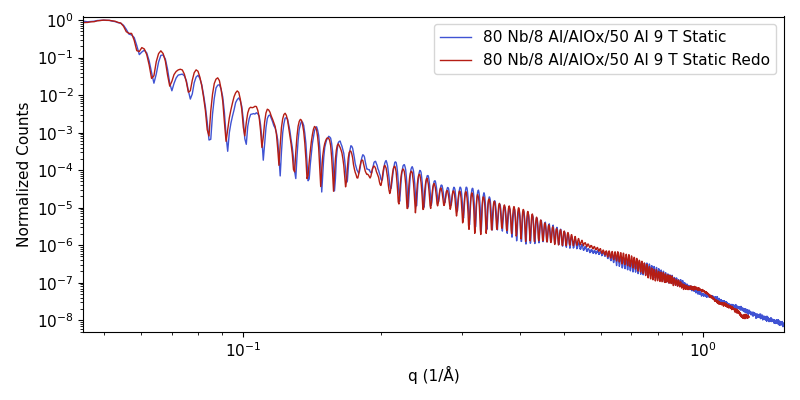

In [63]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [8,9]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1.5])
ax.set_ylim([5e-9,1.25e0])

(5e-08, 1.25)

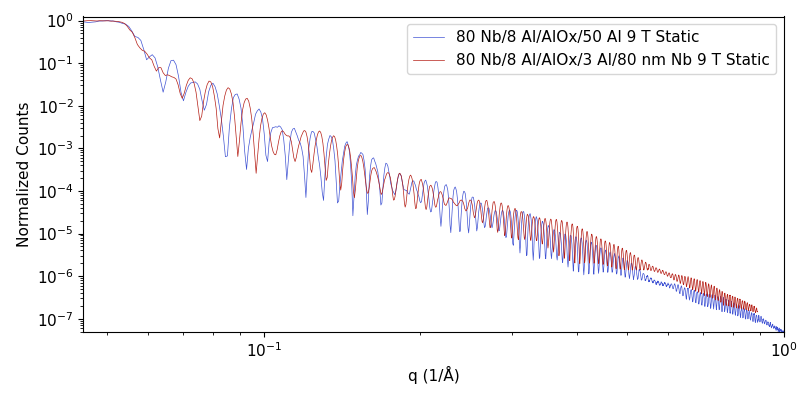

In [64]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [8,10]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=0.5, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1])
ax.set_ylim([5e-8,1.25e0])

(5e-08, 1.25)

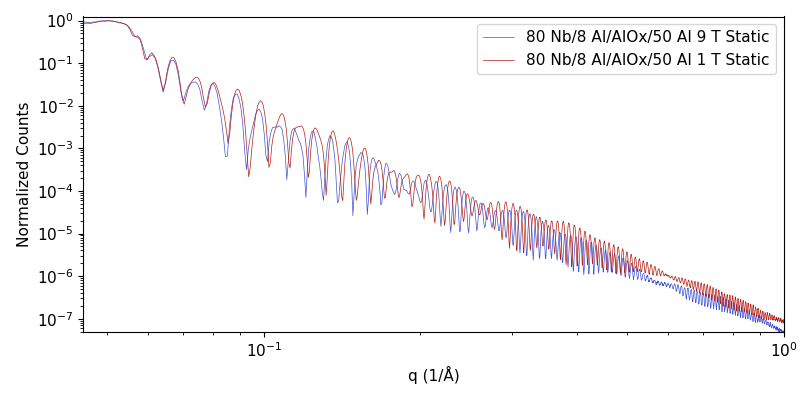

In [65]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [8,11]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=0.5, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1])
ax.set_ylim([5e-8,1.25e0])

(5e-08, 1.25)

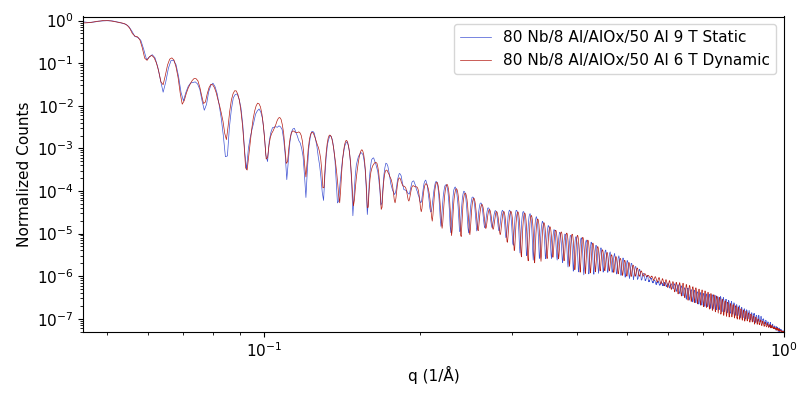

In [66]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [8,12]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=0.5, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1])
ax.set_ylim([5e-8,1.25e0])

(5e-08, 1.25)

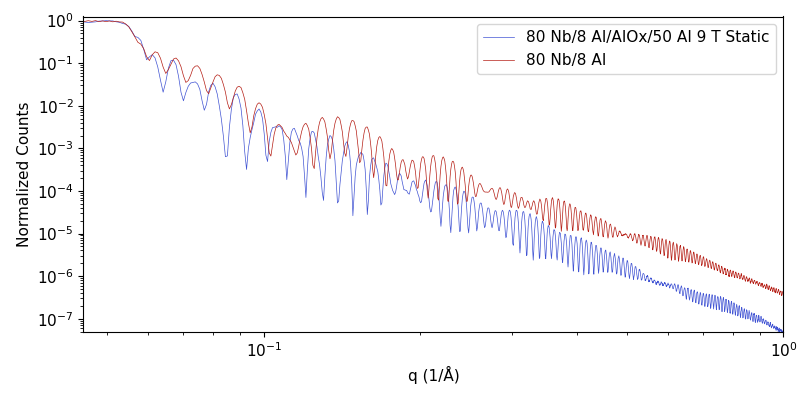

In [67]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [8,13]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=0.5, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1])
ax.set_ylim([5e-8,1.25e0])

(5e-08, 1.25)

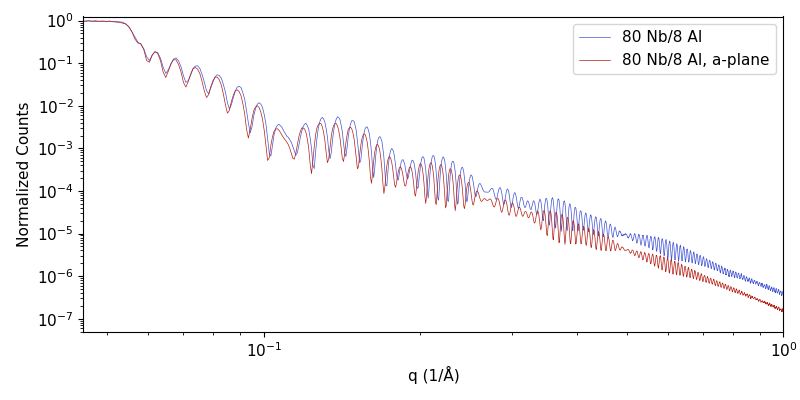

In [68]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [13,14]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=0.5, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1])
ax.set_ylim([5e-8,1.25e0])

(5e-08, 1.25)

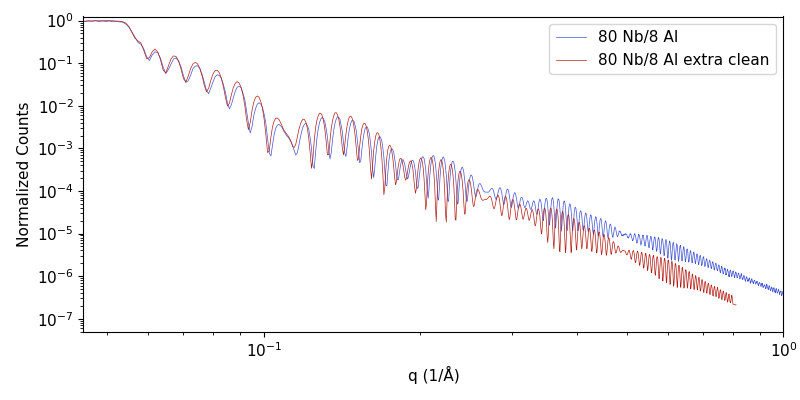

In [69]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [13,15]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=0.5, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1])
ax.set_ylim([5e-8,1.25e0])

(5e-08, 1.25)

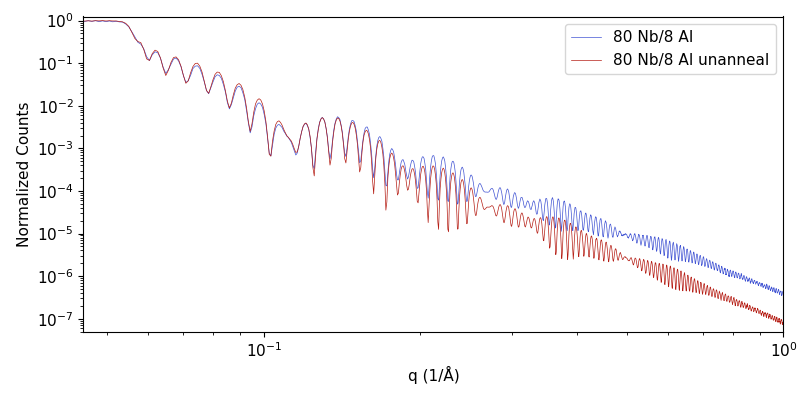

In [70]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [13,16]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=0.5, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1])
ax.set_ylim([5e-8,1.25e0])

(5e-08, 1.25)

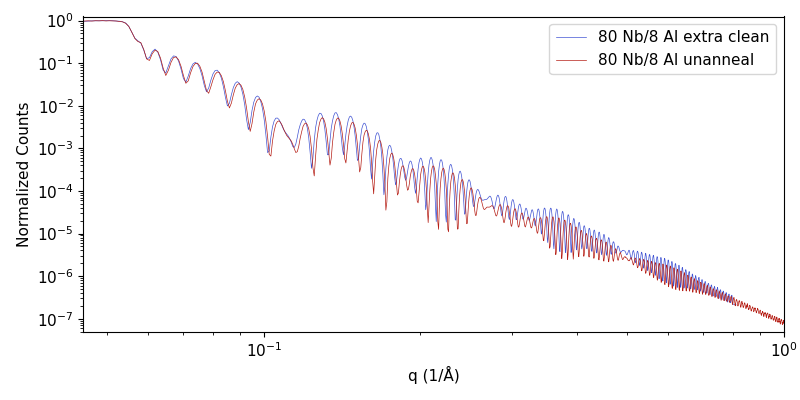

In [71]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [15,16]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=0.5, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.045,1])
ax.set_ylim([5e-8,1.25e0])

(5e-08, 1.25)

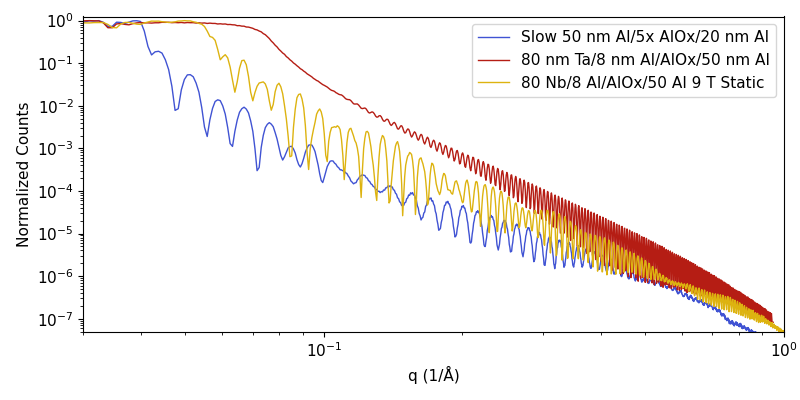

In [72]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
inds = [2,5,8]
for i, f in enumerate(inds):     
    data = ana_xrr.loadRefData(os.path.join(pth,flist[f])) #this function loads to the data and converts the x-data from 2-theta to q
    plt.loglog(data.x, data.y,linewidth=1, label=labs[f])
    
ax.legend()
ax.set_xlabel('q (1/Å)')
ax.set_ylabel('Normalized Counts')
fig.tight_layout()
ax.set_xlim([0.03,1])
ax.set_ylim([5e-8,1.25e0])

Text(0, 0.5, 'Normalized Counts')

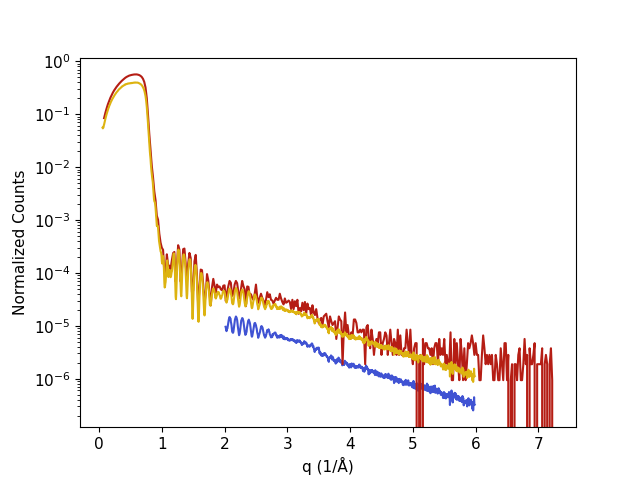

In [78]:
import pandas as pd
df=pd.read_csv(pth + 'Campus/' + 'NANK1_A_XRR_6deg.csv')

plt.figure()
plt.semilogy(df['2Theta'][400:], df['Normalized Counts'][400:])


df=pd.read_csv(pth + 'Campus/'+ 'NANS2_B_XRR_8deg.csv')

plt.semilogy(df['2Theta'][3:], df['Normalized Counts'][3:])


df=pd.read_csv(pth + 'Campus/'+ 'NANK1_B_XRR_6deg.csv')

plt.semilogy(df['2Theta'][8:], df['Normalized Counts'][8:])
plt.xlabel('q (1/Å)')
plt.ylabel('Normalized Counts')